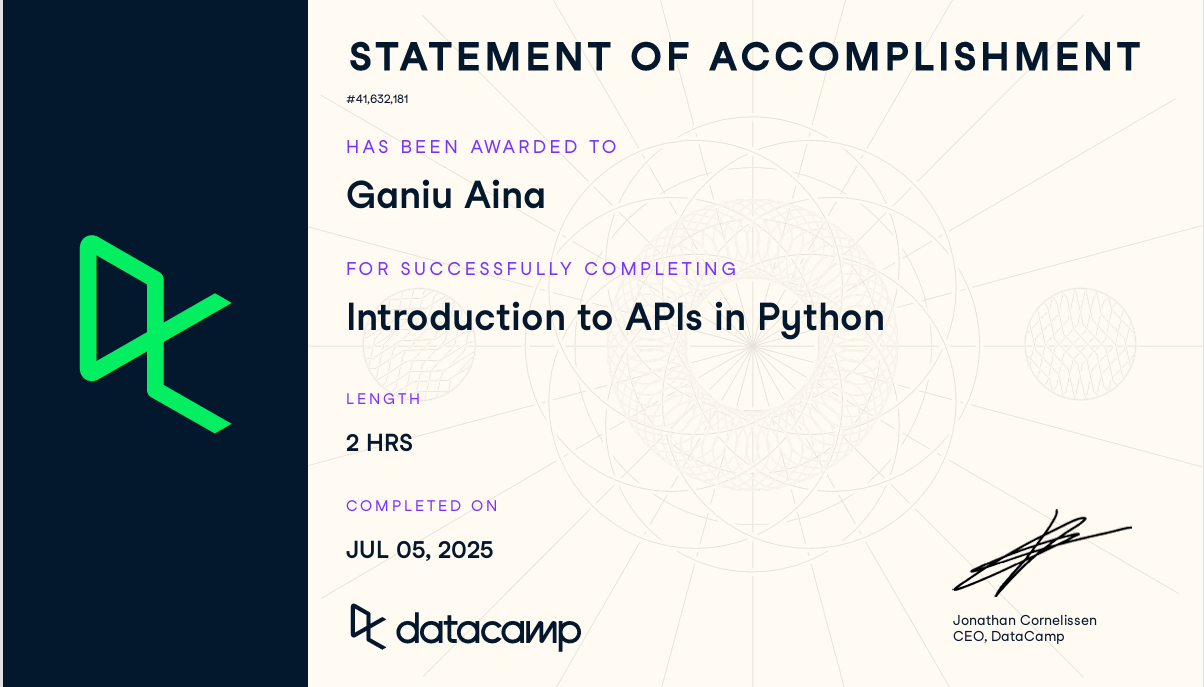

# FOOTBALL API DATA COLLECTION PROJECT

Learn how APIs work through a single demo project—using The Football API to retrieve the 2023 Premier League top scorers.

In [2]:
#importing libraries and dependencies
import pandas as pd
import requests
from requests.exceptions import ConnectionError

## API KEY AND HEADERS

- To understand the API we review the api documentation
- Navigate to the football tab and select premier league as our choice
- To get how to use the api, some documentation was provided
- We utilize the template code on the websites to navigate to our desired data point.

In [8]:
# url of the api
url = "https://v3.football.api-sports.io/players/topscorers?league=39&season=2023"

#headers and api-key
headers = {
  'x-rapidapi-key': 'Api-Key',
  'x-rapidapi-host': 'v3.football.api-sports.io',
  "Accept": "application/json"


}

# parameters though they are the in url we just provide it again
params = {
    "league": "39",
    "season": "2023"
}



response = requests.request("GET", url, headers=headers,params=params)

# using the request to get the status code

if response.status_code == 200:
  print("API Connection Successfull")
else:
    print("Check")

#getting the text

print(response.text)

API Connection Successfull
{"get":"players\/topscorers","parameters":{"league":"39","season":"2023"},"errors":[],"results":20,"paging":{"current":1,"total":1},"response":[{"player":{"id":1100,"name":"E. Haaland","firstname":"Erling","lastname":"Braut Haaland","age":25,"birth":{"date":"2000-07-21","place":"Leeds","country":"England"},"nationality":"Norway","height":"194 cm","weight":"88 kg","injured":false,"photo":"https:\/\/media.api-sports.io\/football\/players\/1100.png"},"statistics":[{"team":{"id":50,"name":"Manchester City","logo":"https:\/\/media.api-sports.io\/football\/teams\/50.png"},"league":{"id":39,"name":"Premier League","country":"England","logo":"https:\/\/media.api-sports.io\/football\/leagues\/39.png","flag":"https:\/\/media.api-sports.io\/flags\/gb-eng.svg","season":2023},"games":{"appearences":31,"lineups":29,"minutes":2559,"number":null,"position":"Attacker","rating":"7.361290","captain":false},"substitutes":{"in":2,"out":9,"bench":3},"shots":{"total":98,"on":59},"g

**Getting to Know the Data in Json format**

In [13]:
data = response.json()

In [57]:
data['response'][0]

{'player': {'id': 1100,
  'name': 'E. Haaland',
  'firstname': 'Erling',
  'lastname': 'Braut Haaland',
  'age': 25,
  'birth': {'date': '2000-07-21', 'place': 'Leeds', 'country': 'England'},
  'nationality': 'Norway',
  'height': '194 cm',
  'weight': '88 kg',
  'injured': False,
  'photo': 'https://media.api-sports.io/football/players/1100.png'},
 'statistics': [{'team': {'id': 50,
    'name': 'Manchester City',
    'logo': 'https://media.api-sports.io/football/teams/50.png'},
   'league': {'id': 39,
    'name': 'Premier League',
    'country': 'England',
    'logo': 'https://media.api-sports.io/football/leagues/39.png',
    'flag': 'https://media.api-sports.io/flags/gb-eng.svg',
    'season': 2023},
   'games': {'appearences': 31,
    'lineups': 29,
    'minutes': 2559,
    'number': None,
    'position': 'Attacker',
    'rating': '7.361290',
    'captain': False},
   'substitutes': {'in': 2, 'out': 9, 'bench': 3},
   'shots': {'total': 98, 'on': 59},
   'goals': {'total': 27, 'conc

## Testing

We are creating an image function that will display any image url

In [58]:
def image_opener(url):
    import requests
    from io import BytesIO
    from PIL import Image

    # 1. Fetch the image
    resp = requests.get(url)

    # 2. Branch on HTTP 200 OK
    if resp.status_code == 200:
        # (Optionally) still raise for other HTTP errors
        resp.raise_for_status()

        # 3. Open it with PIL via a bytes buffer
        img = Image.open(BytesIO(resp.content))

        return img
    else:
        print("Check URL")
        return None

Liverpool FC Logo


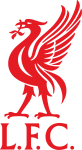

In [59]:
haaland_url = 'https://media.api-sports.io/football/players/1100.png'
salah_url = 'https://media.api-sports.io/football/players/306.png'
liverpool_url = 'https://media.api-sports.io/football/teams/40.png'

print("Liverpool FC Logo")
image_opener(liverpool_url)

Mohammed Salah


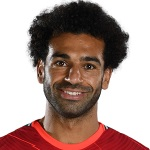

In [55]:
print("Mohammed Salah")
image_opener(salah_url)

Erling Haaland


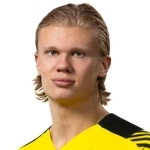

In [60]:
print("Erling Haaland")
image_opener(haaland_url)

In [61]:
player_info = []
for item in data['response']:
    player_name = item['player']['name']
    player_photo = item['player']['photo']
    team = item['statistics'][0]['team']['name']
    team_photo = item['statistics'][0]['team']['logo']
    appearance = item['statistics'][0]['games']['appearences']
    startinglineup = item['statistics'][0]['games']['lineups']
    minutesplayed = item['statistics'][0]['games']['minutes']
    rating = item['statistics'][0]['games']['rating']
    goals = item['statistics'][0]['goals']['total']
    shotsplayed = item['statistics'][0]['shots']['total']
    shotsontarget = item['statistics'][0]['shots']['on']
    penaltyscored = item['statistics'][0]['penalty']['scored']
    penaltymissed = item['statistics'][0]['penalty']['missed']
    position = item['statistics'][0]['games']['position']
    player_info.append({
        'PlayerName':player_name,
        'Team': team,
        'PlayerPhoto':player_photo,
        'TeamImage':team_photo,
        'MatchPlayed': appearance,
        'MatchLineUp': startinglineup,
        'Minutesplayed':minutesplayed,
        'rating':rating,
        'GoalScored':goals,
        'TotalShot': shotsplayed,
        'ShotOnTarget':shotsontarget,
        'PenaltyScored': penaltyscored,
        'PenaltyMissed': penaltymissed,
        'PlayerPosition': position

    })


In [62]:
df = pd.DataFrame(player_info)

In [63]:
df.shape

(20, 14)

In [64]:
df.head(10)

,PlayerName,Team,PlayerPhoto,TeamImage,MatchPlayed,MatchLineUp,Minutesplayed,rating,GoalScored,TotalShot,ShotOnTarget,PenaltyScored,PenaltyMissed,PlayerPosition
0,E. Haaland,Manchester City,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/50.png,31,29,2559,7.361290,27,98,59,7,1,Attacker
1,C. Palmer,Chelsea,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/49.png,33,29,2618,7.745454,22,76,46,9,0,Midfielder
2,A. Isak,Newcastle,https://media.api-sports.io/football/players/2...,https://media.api-sports.io/football/teams/34.png,30,27,2267,7.166666,21,64,43,5,1,Attacker
3,O. Watkins,Aston Villa,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/66.png,37,37,3227,7.335135,19,86,47,0,0,Attacker
4,P. Foden,Manchester City,https://media.api-sports.io/football/players/6...,https://media.api-sports.io/football/teams/50.png,35,33,2868,7.794285,19,64,48,0,0,Midfielder
5,D. Solanke,Bournemouth,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/35.png,38,37,3332,7.021052,19,78,38,2,1,Attacker
6,Mohamed Salah,Liverpool,https://media.api-sports.io/football/players/3...,https://media.api-sports.io/football/teams/40.png,32,28,2536,7.581250,18,90,56,5,2,Attacker
7,Son Heung-Min,Tottenham,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/47.png,35,34,2948,7.568571,17,63,40,2,0,Attacker
8,J. Bowen,West Ham,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/48.png,34,34,3021,7.114705,16,64,37,0,0,Attacker
9,J. Mateta,Crystal Palace,https://media.api-sports.io/football/players/2...,https://media.api-sports.io/football/teams/52.png,35,25,2284,6.974285,16,39,29,2,0,Attacker


In [65]:
# Loop through the list of top scorers for premier league season 2023
for player_data in data['response']:
    name = player_data['player']['name']
    goals = player_data['statistics'][0]['goals']['total']

    print(f"{name}: ⚽ {goals} goals")

E. Haaland: ⚽ 27 goals
C. Palmer: ⚽ 22 goals
A. Isak: ⚽ 21 goals
O. Watkins: ⚽ 19 goals
P. Foden: ⚽ 19 goals
D. Solanke: ⚽ 19 goals
Mohamed Salah: ⚽ 18 goals
Son Heung-Min: ⚽ 17 goals
J. Bowen: ⚽ 16 goals
J. Mateta: ⚽ 16 goals
B. Saka: ⚽ 16 goals
N. Jackson: ⚽ 14 goals
C. Wood: ⚽ 14 goals
K. Havertz: ⚽ 13 goals
Y. Wissa: ⚽ 12 goals
L. Trossard: ⚽ 12 goals
Matheus Cunha: ⚽ 12 goals
Hwang Hee-Chan: ⚽ 12 goals
D. Núñez: ⚽ 11 goals
Richarlison: ⚽ 11 goals


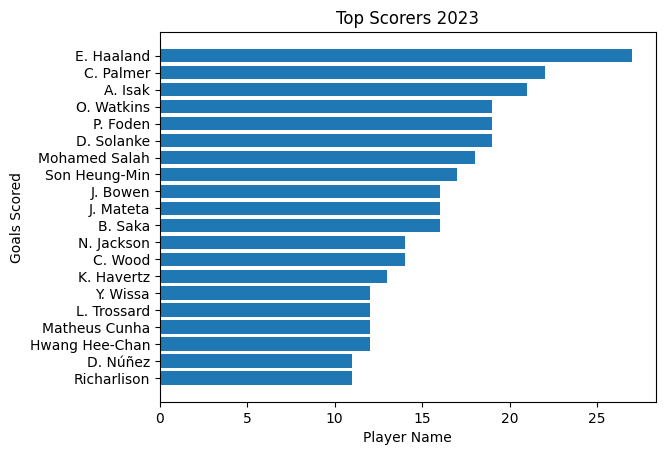

In [74]:
import matplotlib.pyplot as plt
plt.barh(df['PlayerName'], df['GoalScored'])
#sort
plt.gca().invert_yaxis()

plt.xlabel('Player Name')
plt.ylabel('Goals Scored')
plt.title('Top Scorers 2023')
plt.show()

